## Package logopack Command for NetLogo model

This notebook use logopack package which aims to simplify common usage of pyNetLogo library about [mitochondrial NetLogo model](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0168198.s009)

![mitomodel_overview](img/mitomodel_overview.png)

In [1]:
import logopack
import os
import pandas as pd

## Load & Setup Model

Teh linkmodel command link the netlogo model to python object.

>Note: In Windows, pyNetLogo can interact with NetLogo GUI. However, Mac is not the case due to pyNetLogo bug. 

In [10]:
mitologo = logopack.linkmodel(os.path.join('model','mitochondrial-model_v6.nlogo'),gui=False ,setmodel=True)

## Report Global Variables

In mitochondrial netlogo model, global variables include:

Variable_name ; description

-  cx                 ;; x coordinate of the cell
-  cy                 ;; y coordinate of the cell
-  dim_dom            ;; dimension of the domain
-  diam_nuc           ;; diameter of the nucelus
-  dt                 ;; temporal increment
-  sec                ;; second
-  minute             ;; minute
-  hour               ;; hour
-  ds                 ;; spatial increment
-  mito-step_far      ;; mitochondrial step
-  mito-step_close    ;; mitochondrial step
-  EN_stress_level    ;; energetic stress
-  vel_far            ;; mitochondrial velocity
-  vel_close          ;; mitochondrial velocity
-  vel_far2           ;; mitochondrial velocity
-  vel_close2         ;; mitochondrial velocity
-  initial_tot_number ;; initial mitochondrial number
-  MR_th              ;; MR threshold
-  prob_fusIn         ;; probability of fusion
-  prob_fisIn         ;; probability of fission
-  prob_biogenesisIn  ;; probability of biogenesis
-  prob_damIn         ;; probability of damage
-  dam_th             ;; damage threshold
-  totmass            ;; total mass of mitochondria
-  critMass           ;; critical mass
-  min_mito_mass      ;; min mitochondrial mass
-  max_mito_mass      ;; max mitochondrial mass
-  small              ;; mitochondria with size <= 1
-  mid                ;; mitochondria with size in (1,2]
-  big                ;; mitochondria with size > 2
-  counter            ;; counter
-  freq_fusionIn      ;; fusion frequency
-  freq_fissionIn     ;; fission frequency
-  freq_degIn         ;; degradation frequency
-  freq_bioIn         ;; biogenesis frequency
-  arrmito            ;; array of all mitochondria
-  arrmitoDam         ;; array of all damaged mitochondria
-  totmassGreen       ;; total mass of GFP labeled mitochondria
-  totmassDam         ;; total mass of damaged mitochondria
-  totmassLow         ;; total mass of low damaged mitochondria
-  totmassHigh        ;; total mass of high damaged mitochondria


In [14]:
globs = mitologo.repglobal(['cx', 'cy', 'dim_dom', 'diam_nuc', 'dt', 'sec', 'minute', 
                    'hour', 'ds', 'mito-step_far', 'mito-step_close', 'EN_stress_level', 
                    'vel_far', 'vel_close', 'vel_far2', 'vel_close2', 'initial_tot_number', 
                    'MR_th', 'prob_fusIn', 'prob_fisIn', 'prob_biogenesisIn', 'prob_damIn', 
                    'dam_th', 'totmass', 'critMass', 'min_mito_mass', 'max_mito_mass', 'small',
                    'mid', 'big', 'counter', 'freq_fusionIn', 'freq_fissionIn', 'freq_degIn',
                    'freq_bioIn', 'totmassGreen', 'totmassDam', 'totmassLow', 'totmassHigh'])
globs

{'EN_stress_level': 0.0,
 'MR_th': 660.0,
 'big': 0.0,
 'counter': 301.52926677270614,
 'critMass': 1.0,
 'cx': 25.0,
 'cy': 25.0,
 'dam_th': 600.0,
 'diam_nuc': 16.666666666666668,
 'dim_dom': 50.0,
 'ds': 1.0,
 'dt': 1.0,
 'freq_bioIn': 1740.0,
 'freq_degIn': 360.0,
 'freq_fissionIn': 300.0,
 'freq_fusionIn': 300.0,
 'hour': 3600.0,
 'initial_tot_number': 0.0,
 'max_mito_mass': 3.0,
 'mid': 0.0048589828498231905,
 'min_mito_mass': 0.5,
 'minute': 60.0,
 'mito-step_close': 0.44,
 'mito-step_far': 1.0,
 'prob_biogenesisIn': 0.0,
 'prob_damIn': 40.0,
 'prob_fisIn': 50.0,
 'prob_fusIn': 50.0,
 'sec': 1.0,
 'small': 0.10071103540551733,
 'totmass': 0.10557001825534053,
 'totmassDam': 0.1495676828543376,
 'totmassGreen': 0.0,
 'totmassHigh': 0.0,
 'totmassLow': 0.0,
 'vel_close': 0.32975471660615235,
 'vel_close2': 0.00837854224631641,
 'vel_far': 0.5717656845086678,
 'vel_far2': 0.7889576422253649}

## Report Agent Variables

#### Agent Types

In [mitochondrial NetLogo model](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0168198.s009), agents are defined as "breeds" object.

<table>
  <tr>
    <td>Breed Name</td>
    <td>Description</td>
    <td>Agent Variables</td>
  </tr>
  <tr>
    <td>mitos</td>
    <td>Mitochondria</td>
    <td>'who','xcor','ycor','size','damage_level','mr_level','dam'</td>
  </tr>
  <tr>
    <td>lysos</td>
    <td>lysosomes. When it meets damaged mitochondrion, it will autophage mitochondrion then die. lysosomes' size remain 1.</td>
    <td>'who','xcor','ycor','size'</td>
  </tr>
</table>

#### Agent Figures

Here is the graph in [mitochondrial NetLogo model](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0168198.s009)

<table>
  <tr>
    <td>Healthy mitochondria</td>
    <td>Damaged mitochondria</td>
    <td>Ongoing mitochondrial autophagy</td>
    <td>Mitochondrial autophagy</td>
    <td>Lysosome</td>
  </tr>
</table>

![mitomodel_agent-type](img/mitomodel_agent-type.png)

In [4]:
mitos = mitologo.repagents(breed_name= 'mitos',indexes=['who','xcor','ycor','size','damage_level','mr_level','dam'])
pd.DataFrame(mitos).head()

,dam,damage_level,mr_level,size,who,xcor,ycor
0,False,0.0,0.0,0.606664,3.0,33.838925,5.788118
1,False,0.0,0.0,1.978244,4.0,8.427171,39.226555
2,False,0.0,0.0,0.632903,5.0,38.620313,30.762756
3,False,0.0,0.0,0.710612,6.0,23.610644,33.930114
4,False,0.0,0.0,1.907141,7.0,21.833756,16.096060


## Plot 

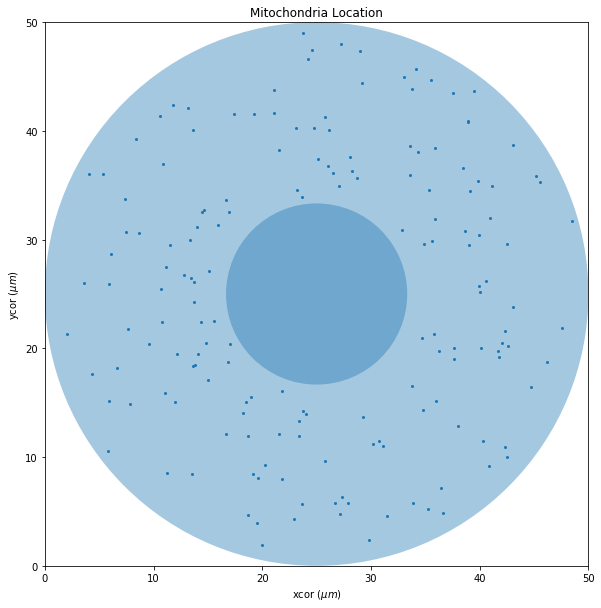

In [5]:
import matplotlib.pyplot as plt
fig, ax = mitologo.plotcell(figsize=(10,10))
plt.savefig(r'img/plotcell.pdf')

## Proceed the model- go command

When comparing dic1 and dic2, you can notice that the number of the first id is always increasing. This is due to biogensis and inhilation of mitochondria 

<Figure size 432x288 with 0 Axes>

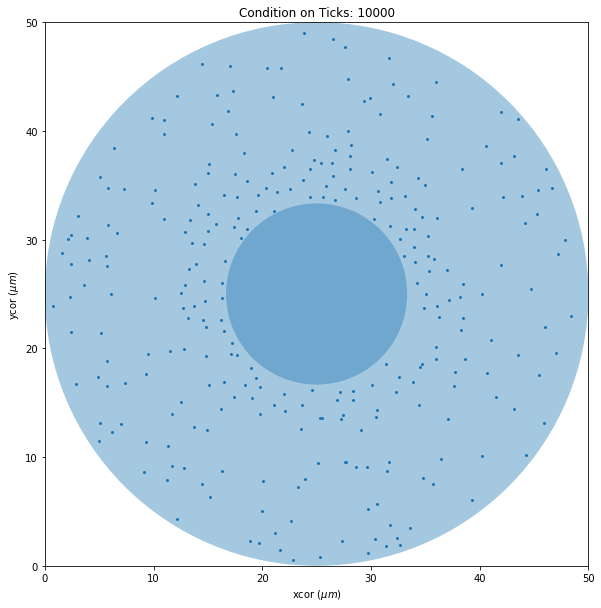

CPU times: user 15.7 s, sys: 254 ms, total: 16 s
Wall time: 9.28 s


In [6]:
%%time
# Proceed 10000 times

steps = 10000

for i in range(0,1):
    plt.figure()
    mitologo.go(steps=steps)
    dic1 = mitologo.repagents()
    mitologo.plotcell(title='Condition on Ticks: '+str(int(mitologo.report('ticks'))))
    plt.show()

## Interactive widgets

In [11]:
# Reset the model 
mitologo.setup()

In [12]:
%matplotlib inline

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from ipywidgets import Layout, widgets
from IPython.display import display,clear_output

# ASSIGN STEPS
steps = 1000

plt.ioff()
ax=plt.gca()
out=widgets.Output(layout=Layout(height='300px', width = '400px'))
# Add patches
patches = []
patches.append(Circle((mitologo.glob['cx'],mitologo.glob['cy']),mitologo.glob['diam_nuc']/2.0)) # Nucleus
patches.append(Circle((mitologo.glob['cx'],mitologo.glob['cy']),mitologo.glob['dim_dom']/2.0)) # Cell

# define collection
p = PatchCollection(patches, alpha=0.4)
button=widgets.Button(description='Next')
vbox=widgets.VBox(children=(out,button))
display(vbox)

def click(b):
    ax.clear()
    plt.axis([0, mitologo.glob['dim_dom'], 0, mitologo.glob['dim_dom']])
    ax.scatter(mitologo.agents['xcor'], mitologo.agents['ycor'], s=4)

    ax.set_xlabel('xcor ($\mu m$)')
    ax.set_ylabel('ycor ($\mu m$)')
    ax.set_aspect('equal')
    ax.add_collection(p)
    plt.title('Condition on Ticks: '+str(int(mitologo.report('ticks'))))
    with out:
        mitologo.go(steps=steps)
        clear_output(wait=True)
        display(ax.figure)

button.on_click(click)
click(None)

### Shutdown

In [9]:
# mitologo.kill_workspace()